In [1]:
import site
import subprocess
from pathlib import Path
import random

repo_root = Path.cwd().resolve()
while repo_root != repo_root.parent and not (repo_root / 'pyproject.toml').exists():
    repo_root = repo_root.parent
if not (repo_root / 'pyproject.toml').exists():
    raise RuntimeError('Could not locate repository root with pyproject.toml')

site.addsitedir(str(repo_root / 'python'))
subprocess.run(['cmake', '-S', str(repo_root), '-B', str(repo_root / 'build-release'), '-DCMAKE_BUILD_TYPE=Release'], check=True)
subprocess.run(['cmake', '--build', str(repo_root / 'build-release'), '--target', 'qerasure_python', '-j'], check=True)


CMake Deprecation Warning at build/_deps/pybind11-src/CMakeLists.txt:8 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.




-- pybind11 v2.11.0 
-- Configuring done (0.1s)
-- Generating done (0.1s)
-- Build files have been written to: /Users/aryakakodkar/Documents/qerasure/build-release
[ 71%] Built target qerasure
[100%] Built target qerasure_python


CMake Warning (dev) at build/_deps/pybind11-src/tools/FindPythonLibsNew.cmake:98 (find_package):
  Policy CMP0148 is not set: The FindPythonInterp and FindPythonLibs modules
  are removed.  Run "cmake --help-policy CMP0148" for policy details.  Use
  the cmake_policy command to set the policy and suppress this warning.

Call Stack (most recent call first):
  build/_deps/pybind11-src/tools/pybind11Tools.cmake:50 (find_package)
  build/_deps/pybind11-src/tools/pybind11Common.cmake:188 (include)
  build/_deps/pybind11-src/CMakeLists.txt:210 (include)
This warning is for project developers.  Use -Wno-dev to suppress it.



CompletedProcess(args=['cmake', '--build', '/Users/aryakakodkar/Documents/qerasure/build-release', '--target', 'qerasure_python', '-j'], returncode=0)

In [2]:
from qerasure import (
    RotatedSurfaceCode,
    NoiseParams,
    ErasureSimParams,
    ErasureSimulator,
    ErasureQubitSelection,
    visualize_erasures,
    PauliError,
    LoweredErrorParams,
    LoweringParams,
    Lowerer,
    visualize_lowering,
)


(<Figure size 700x700 with 1 Axes>,
 <Axes: title={'center': 'Rotated Surface Code (d=3, n=17)'}, xlabel='x', ylabel='y'>)

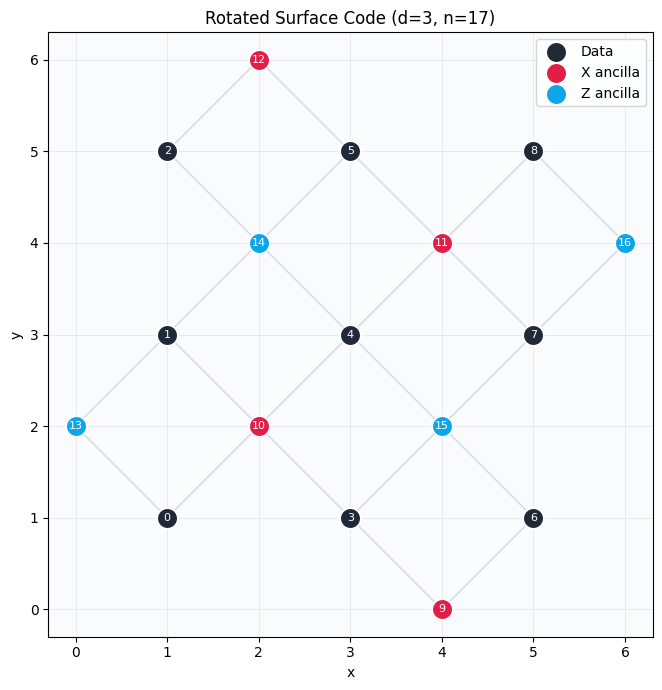

In [3]:
code = RotatedSurfaceCode(distance=3)
code.draw()


In [4]:
noise = NoiseParams(p_two_qubit_erasure=0.01)


In [5]:
sim_params = ErasureSimParams(
    code=code,
    noise=noise,
    qec_rounds=10,
    shots=1000,
    seed=random.randint(0, 2**32 - 1),
    erasure_selection=ErasureQubitSelection.DATA_QUBITS,
)
simulator = ErasureSimulator(sim_params)


In [6]:
result = simulator.simulate()


In [7]:
len(result.erasure_timestep_offsets[0]), len(result.sparse_erasures[0])


(42, 8)

(<Figure size 1200x800 with 3 Axes>,
 (<Axes: title={'center': 'Erasure Timeline (shot=0, qubits=17)'}, ylabel='Qubit index (subset order)'>,
  <Axes: xlabel='Timestep', ylabel='Events'>))

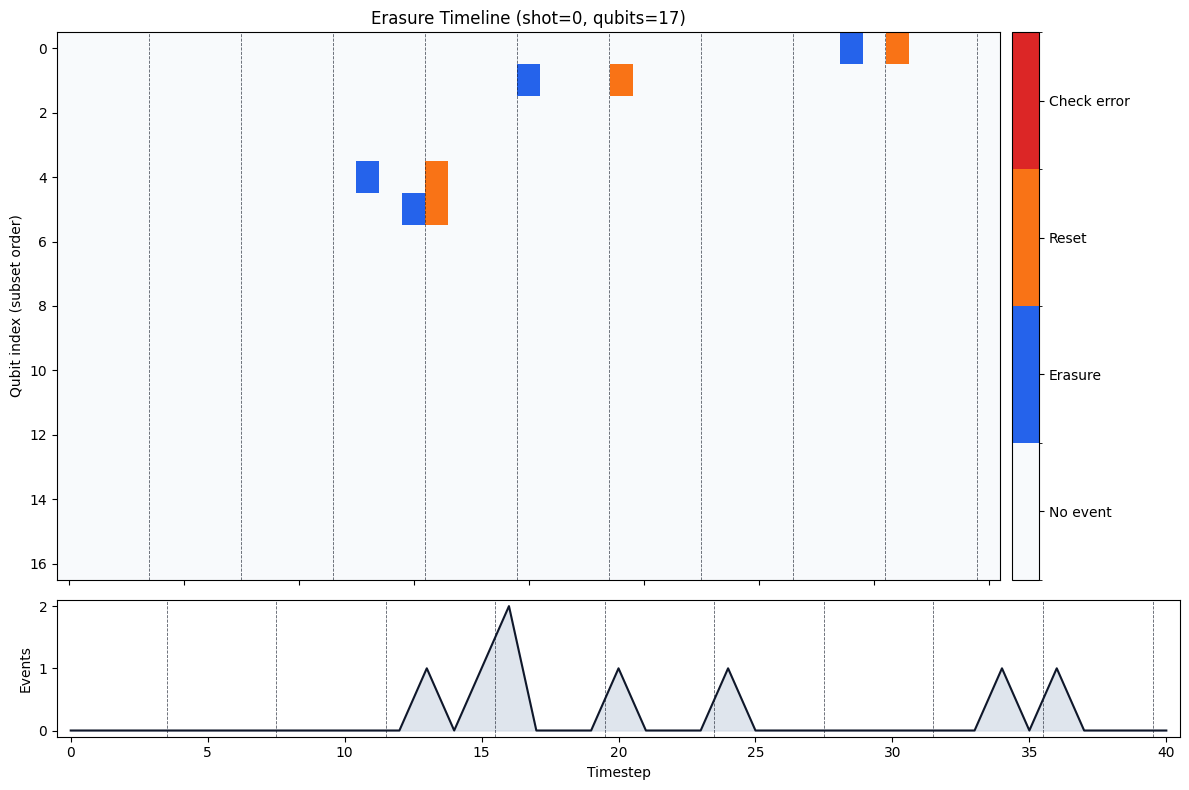

In [8]:
visualize_erasures(result, sim_params, shot_idx=0)


In [9]:
reset_lowering = LoweredErrorParams(PauliError.Z_ERROR, 1.0)
x_ancilla_lowering = LoweredErrorParams(PauliError.X_ERROR, 0.5)
z_ancilla_lowering = LoweredErrorParams(PauliError.Z_ERROR, 0.5)
lowering_params = LoweringParams(reset_lowering, x_ancilla_lowering, z_ancilla_lowering)
lowerer = Lowerer(code, lowering_params)
lowering_result = lowerer.lower(result)


(<Figure size 1200x800 with 3 Axes>,
 (<Axes: title={'center': 'Lowering Timeline (shot=0, qubits=17)'}, ylabel='Qubit index (subset order)'>,
  <Axes: xlabel='Timestep', ylabel='Events'>))

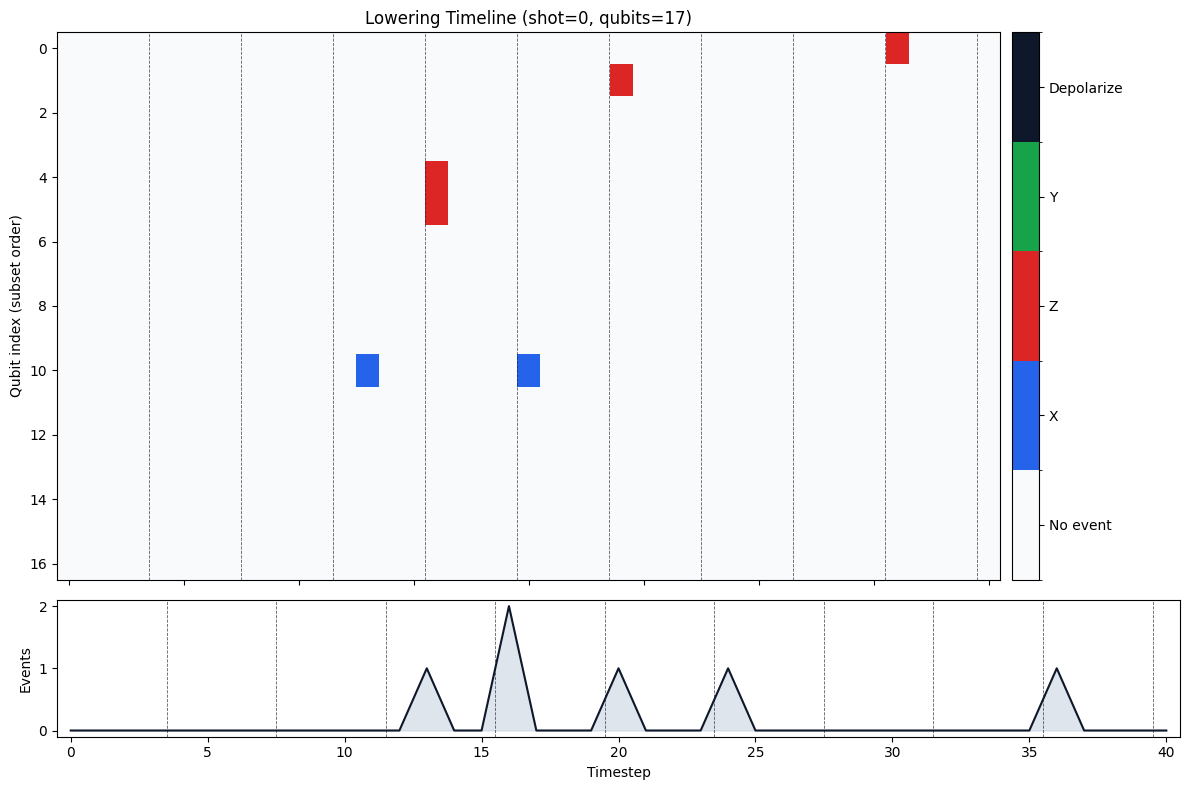

In [10]:
visualize_lowering(lowering_result, sim_params, shot_idx=0)
